### Example for linear regression

In [17]:
import numpy as np
import statsmodels.api as sm

# Generating some example data
np.random.seed(0)
X1 = np.random.rand(100) * 10  # random data for X1
X2 = np.random.rand(100) * 10  # random data for X2
X3 = np.random.rand(100) * 10  # random data for X3
X4 = np.random.rand(100) * 10  # random data for X4
X5 = np.random.rand(100) * 10  # random data for X5

Y = 3 * X1 + 2 * X2 + 4 * X3 + X4 + 5 * X5 + 2 + np.random.randn(100)  # Y = 3X1 + 2X2 + 4X3 + X4 + 5X5 + 2 + noise

# Stacking X data into one 2-D array
X = np.column_stack((X1, X2, X3, X4, X5))

# Note the difference in argument order
model = sm.OLS(Y, sm.add_constant(X)).fit()  # sm.add_constant() adds the intercept term (beta_0)

# Print out the statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     8156.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          2.50e-122
Time:                        22:35:07   Log-Likelihood:                -143.90
No. Observations:                 100   AIC:                             299.8
Df Residuals:                      94   BIC:                             315.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1643      0.459      4.718      0.0

***Exemplary figure for OLS estimation, not connected with example above***

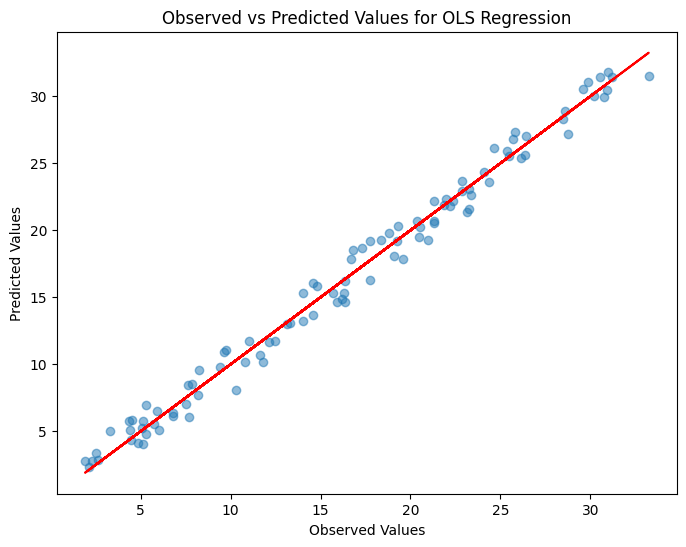

In [18]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(0)
X = np.random.rand(100) * 10  # random data for X
Y = 3 * X + 2 + np.random.randn(100)  # Y = 3X + 2 + noise

# Fit the model
X = sm.add_constant(X)  # adds the intercept term (beta_0)
model = sm.OLS(Y, X).fit()

# Make predictions
predictions = model.predict(X)

# Create a figure
plt.figure(figsize=(8,6))

# Create a scatter plot of observed Y values vs predicted Y values
plt.scatter(Y, predictions, alpha=0.5)

# Add a line for perfect correlation. This is where we would expect our predicted values to fall if our model was perfect.
plt.plot(Y, Y, color='red')

# Label axes
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")

# Add title
plt.title("Observed vs Predicted Values for OLS Regression")

# Show the plot
plt.show()


# Logistic regression, example with 'default of credit card clients'

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv('default of credit card clients.csv', header=1, sep=";")

In [3]:
# Preprocess the dataset
# Rename the 'default payment next month' to 'default' for simplicity
df = df.rename(columns={'default payment next month': 'default'})

In [4]:
# Define the feature matrix X and target y
X = df.drop('default', axis=1)
y = df['default']

In [5]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# Add constant to the feature matrix for the logistic regression intercept
X = sm.add_constant(X)

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create a logistic regression model
model = sm.Logit(y_train, X_train)

In [9]:
# Fit the model
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.465067
         Iterations 7


In [10]:
# Print the summary statistics of the regression model
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23975
Method:                           MLE   Df Model:                           24
Date:                Wed, 05 Jul 2023   Pseudo R-squ.:                  0.1211
Time:                        21:36:53   Log-Likelihood:                -11162.
converged:                       True   LL-Null:                       -12700.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4592      0.018    -79.195      0.000      -1.495      -1.423
x1            -0.0039      0.017     -0.233      0.815      -0.037       0.029
x2            -0.1064      0.023     -4.677      0.0

In [11]:
# Predict the probabilities of default on the test set
y_pred = result.predict(X_test)

In [12]:
# Convert probabilities into binary outcomes
y_pred_binary = [0 if p < 0.5 else 1 for p in y_pred]

In [13]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
# Print accuracy score and confusion matrix

# VerticaL: True labels
# Horizontal: Predicted Labels
# 0;0: True positive
# 1;0: False negative
# 0;1: False positive
# 1;1: True negative

print('Accuracy on test data:', accuracy_score(y_test, y_pred_binary))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_binary))

Accuracy on test data: 0.81
Confusion matrix:
[[4550  137]
 [1003  310]]


### Evaluate and discuss model performance with CAP Curve

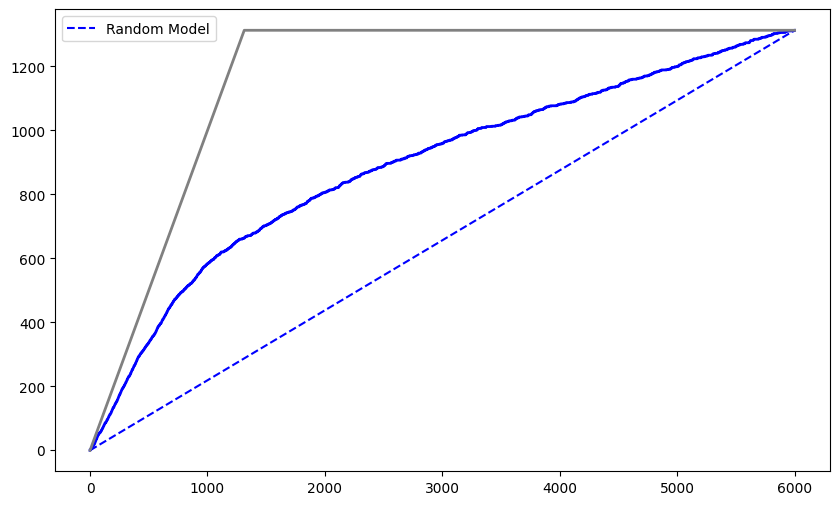

In [15]:
# code for the random plot
import matplotlib.pyplot as plt
import numpy as np
 
# length of the test data
total = len(y_test)
 
# Counting '1' labels in test data
one_count = np.sum(y_test)
 
# counting '0' labels in test data
zero_count = total - one_count
 
plt.figure(figsize = (10, 6))
 
# x-axis ranges from 0 to total people contacted
# y-axis ranges from 0 to the total positive outcomes.
 
plt.plot([0, total], [0, one_count], c = 'b',
         linestyle = '--', label = 'Random Model')
plt.legend()

lm = [y for _, y in sorted(zip(y_pred, y_test), reverse = True)]
x = np.arange(0, total + 1)
y = np.append([0], np.cumsum(lm))
plt.plot(x, y, c = 'b', label = 'Random classifier', linewidth = 2)

plt.plot([0, one_count, total], [0, one_count, one_count],
         c = 'grey', linewidth = 2, label = 'Perfect Model')


### Task: Remove unnecessary input parameters and compare results

### Logistic regression

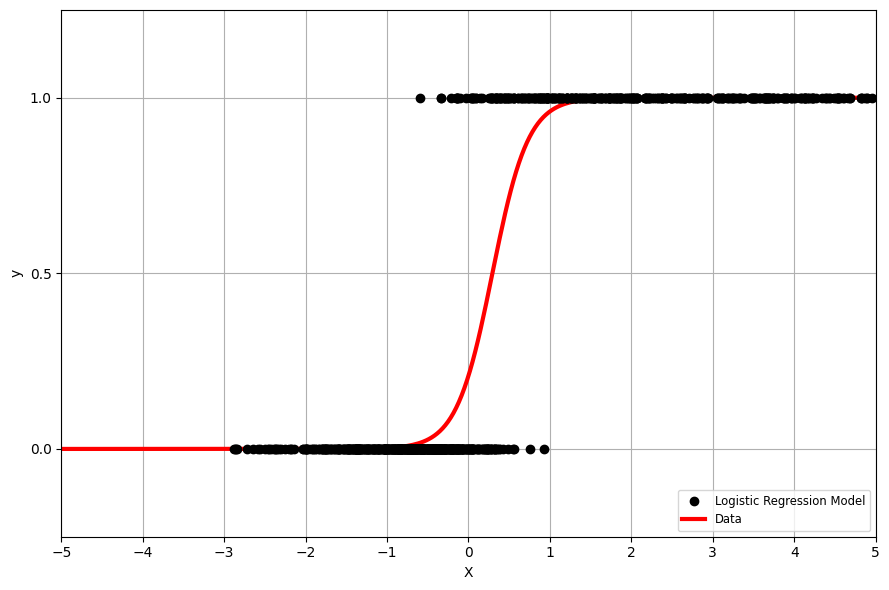

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create synthetic data
np.random.seed(0)
n_samples = 1000
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Create logistic regression model
clf = LogisticRegression(solver='lbfgs')
clf.fit(X, y)

# Create a smooth curve
X_test = np.linspace(-5, 5, 300)

def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(X_test * clf.coef_ + clf.intercept_).ravel()

plt.figure(1, figsize=(9, 6))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
plt.plot(X_test, loss, color='red', linewidth=3)
plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 6))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-5, 5)
plt.legend(('Logistic Regression Model', 'Data'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.grid()
plt.show()
